# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [2]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [4]:
date=np.array('2019-12-04',dtype=np.datetime64)
date

array('2019-12-04', dtype='datetime64[D]')

In [6]:
week=date+np.arange(7)
week

array(['2019-12-04', '2019-12-05', '2019-12-06', '2019-12-07',
       '2019-12-08', '2019-12-09', '2019-12-10'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [8]:
index=pd.DatetimeIndex(['2016-02-11','2016-07-01','2016-07-09','2016-10-08','2017-02-18','2017-02-25','2017-05-02','2017-08-26','2017-12-15','2018-02-11'])
index


DatetimeIndex(['2016-02-11', '2016-07-01', '2016-07-09', '2016-10-08',
               '2017-02-18', '2017-02-25', '2017-05-02', '2017-08-26',
               '2017-12-15', '2018-02-11'],
              dtype='datetime64[ns]', freq=None)

In [12]:
data=pd.Series(range(10),index=index)
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

In [13]:
datafrom2017=np.where(data.index.year==2017)
datafrom2017

(array([4, 5, 6, 7, 8], dtype=int64),)

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [14]:
pd.to_datetime(datetime(2017,12,15))

Timestamp('2017-12-15 00:00:00')

In [15]:
pd.to_datetime("8th of October 2016")

Timestamp('2016-10-08 00:00:00')

In [17]:
pd.to_datetime('20180211')

Timestamp('2018-02-11 00:00:00')

In [18]:
pd.to_datetime('2017-02-25')

Timestamp('2017-02-25 00:00:00')

In [20]:
pd.to_datetime('2017-02-25')

Timestamp('2017-02-25 00:00:00')

In [21]:
pd.to_datetime('2019-Jan-16')

Timestamp('2019-01-16 00:00:00')

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [22]:
pd.timedelta_range(0,periods=5,freq='1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [25]:
from pandas.tseries.offsets import BDay
pd.date_range('2019-12-04',periods=20,freq=BDay())

DatetimeIndex(['2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09',
               '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13',
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [40]:
traveldata=pd.read_csv('datasets/smalltravel.csv',index_col="Date",parse_dates=True)
traveldata.head(22)

,GoingTo,AvgSpeed,MovingTime
Date,,,
2012-01-06,Home,78.3,36.3
2012-01-06,GSK,81.8,34.9
2012-01-04,Home,82.0,35.9
2012-01-04,GSK,74.2,35.6
2012-01-03,Home,83.4,34.8
2012-01-03,GSK,84.5,35.0
2012-01-02,Home,82.9,35.3
2012-01-02,GSK,77.5,34.3
2011-12-23,GSK,80.9,36.0


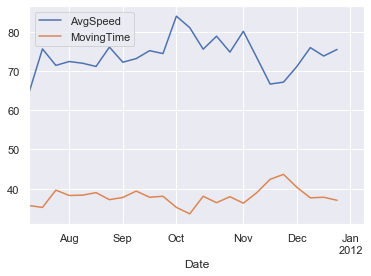

In [32]:
weeklydata=traveldata.resample('W').mean()
weeklydata.plot()

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [33]:
by_weekday=data.groupby(data.index.dayofweek).mean()

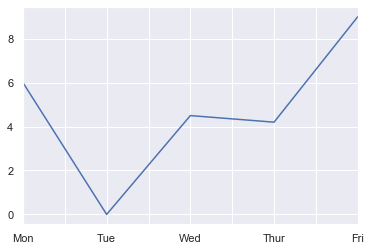

In [37]:
by_weekday.index=['Mon','Tue','Wed','Thur','Fri']
by_weekday.plot()

In [38]:
by_weekday.head()


Mon     6.0
Tue     0.0
Wed     4.5
Thur    4.2
Fri     9.0
dtype: float64